In [1]:
import numpy as np
import h5py
import re
from data_analysis_codes import param
import matplotlib.pyplot as plt
from matplotlib import ticker
from data_analysis_codes.tools import Plot2d
from data_analysis_codes.tools import LinData

In [2]:
p = param.pflrw_d5e2_L50_z500_N16_LCDM()
Lin = LinData.LinData_Class(p, '/home/robynm/simulations/'+p.sim_name+'/')

 could not read time file


In [3]:
k = []
for i in ['0','1','2','3','4']:
    path = '/home/robynm/simulations/pflrw_d5e2_L50_z500_N16_LCDM/output-0000/pflrw_L50/admbase-curv.file_'+i+'.h5'
    f = h5py.File(path, 'r')
    k += [np.array(f['ADMBASE::kxx it=0 tl=0 rl=0 c='+i])[3:-3,3:-3,3:-3]]

#unsectioned_data = np.append(np.append(k[0], k[1], axis=1), np.append(k[2], k[3], axis=1), axis=0)

In [4]:
def plot(p, data):
    N = 1
    
    P = Plot2d.MyPlot2dclass(p, Lin)
    plt.figure(figsize=(22, 10))

    plt.subplot(351)
    P.f_xd(data, 0)
    plt.subplot(356)
    P.f_yd(data, 0)
    plt.subplot(3,5,11)
    P.f_zd(data, 0)

    plt.subplot(352)
    P.f_xnd(data, 0)
    plt.subplot(357)
    P.f_ynd(data, 0)
    plt.subplot(3,5,12)
    P.f_znd(data, 0)

    plt.subplot(353)
    P.f_xy(data, 0, i=int(N/4-1))
    plt.subplot(358)
    P.f_xy(data, 0, i=int(N/2-1))
    plt.subplot(3,5,13)
    P.f_xy(data, 0, i=int(3*N/4-1))

    plt.subplot(354)
    P.f_xz(data, 0, i=int(N/4-1))
    plt.subplot(359)
    P.f_xz(data, 0, i=int(N/2-1))
    plt.subplot(3,5,14)
    P.f_xz(data, 0, i=int(3*N/4-1))

    plt.subplot(355)
    P.f_yz(data, 0, i=int(N/4-1))
    plt.subplot(3,5,10)
    P.f_yz(data, 0, i=int(N/2-1))
    plt.subplot(3,5,15)
    P.f_yz(data, 0, i=int(3*N/4-1))

In [7]:
for i in range(5):
    print(np.shape(k[i]))

(10, 12, 8)
(10, 12, 8)
(10, 4, 16)
(6, 8, 16)
(6, 8, 16)


In [5]:
s = np.append(np.append(np.append(k[0], k[1], axis=2), k[2], axis=1), np.append(k[3],k[4],axis=1), axis=0)

/home/robynm/MyCodes/jupiter_notebooks/data_analysis_codes/tools/Plot2d.py:116: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x, y, z, cmap=plt.cm.get_cmap('inferno'))


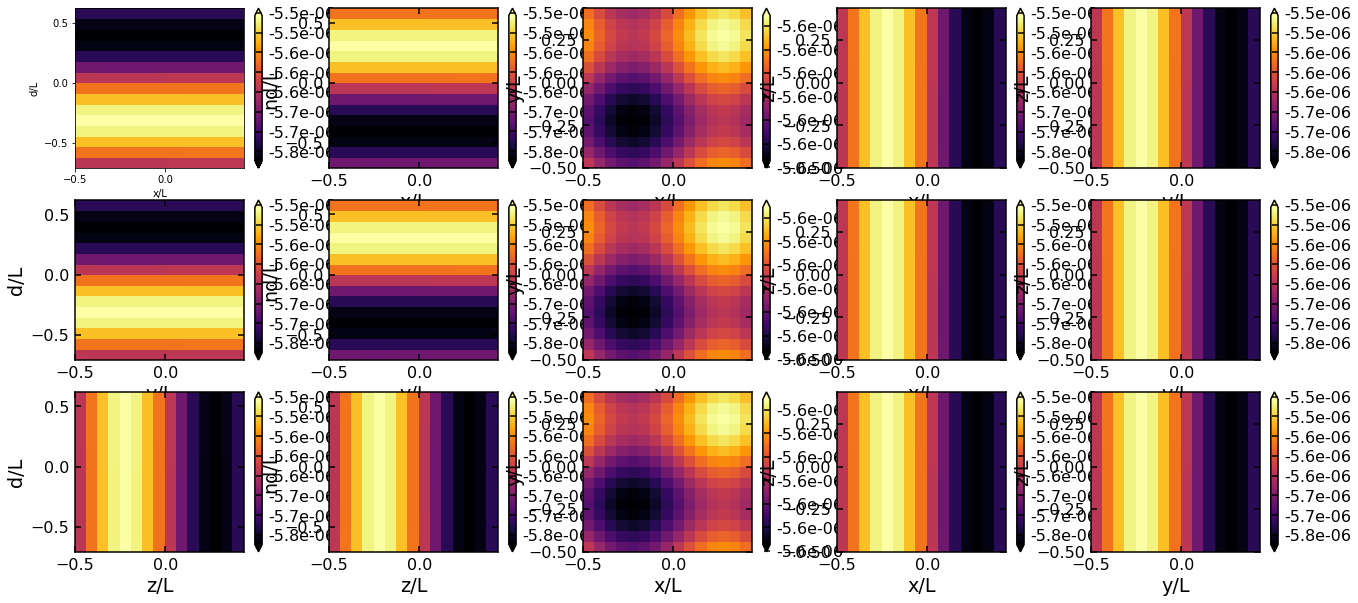

In [6]:
plot(p, s)